# Lab3b Magnetometer Data Analysis
Contents of this notebook are developed by Dogacan Su Ozturk for the GEOS 419 Lecture. 

# This notebook

1. Importing essential Python libraries
2. Loading EZIE Magnetometer Data
   - Importing helper functions
   - Unzipping data files
   - Copying data to a folder
   - Reading the text files into a Pandas dataframe
3. Downloading GIMA and USGS Magnetometer Data
   - Importing PySpedas
   - Downloading data for Poker Flat (GIMA) and College (USGS) sites
4. Comparing EZIE measurements with the science grade magnetometers
   - Plotting data with Matplotlib
   - Removing baseline
   - Labelling and saving figures


### 1. Importing essential Python libraries
Most of the functionality of this notebook comes from importing essential Python libraries. I am now assuming you are quite comfortable with the Python libraries, therefore I will only provide a brief summary of their functionality. 

In [2]:
# Essential Python libraries for this exercise
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%D/%m %H:%M')
#%matplotlib widget 

### 2. Loading EZIE Magnetometer Data
In order to reduce cluttering, I have included the functionality that you would need to read and parse EZIE magnetometer data files in a separate file called 'ezie_mag_helper_functions'. You can import different functions from this helper library to unzip and merge different data files. To learn more about functionality you can use the standard Python syntax. These libraries are imported as follows.

In [3]:
# Libraries for unzipping eziemag data
from ezie_mag_helper_functions import unzip_ezie_files

First we will start with the unzip_ezie_files function. Once you download the data using the eziemag.local interface, you will notice the files are zipped in a specific format. The functions you will use are geared towards 60 second averaged files. You will need to develop your own helper functions or modify the existing functionality by changing the folderpath if you wish to use 1 second data. In the examples below, we are using the unzip_ezie_files function. This function takes three parameters, the first one being the keyword string assigned to the magnetometer, the second is a string of folderpath, and the third is a logical flag if you want to copy all individual daily measurements unzipped into one big folder. By design, this folder will be placed in the folderpath, with a name appending the keyword with '_merged'.

In [4]:
geos1_filepath = unzip_ezie_files('geos1','GEOS_419_1/Deployment_00_20241216_20/', merge=True)
geos2_filepath = unzip_ezie_files('geos2','GEOS_419_2/Deployment_00_20241216_20/', merge=True)
geos3_filepath = unzip_ezie_files('geos3','GEOS_419_3/Deployment_00_20241216_20/', merge=True)

Writing zip file as  GEOS_419_1/Deployment_00_20241216_20/geos1_20241218 .
File unzipped in filepath.
Writing zip file as  GEOS_419_1/Deployment_00_20241216_20/geos1_20241217 .
File unzipped in filepath.
Writing zip file as  GEOS_419_1/Deployment_00_20241216_20/geos1_20241219 .
File unzipped in filepath.
Writing zip file as  GEOS_419_1/Deployment_00_20241216_20/geos1_20241216 .
File unzipped in filepath.
Merging files under one folder.
Searching for hourly files in  ['GEOS_419_1/Deployment_00_20241216_20/geos1_20241218/home/ezie/smr.60s/20241218']
Searching for hourly files in  ['GEOS_419_1/Deployment_00_20241216_20/geos1_20241217/home/ezie/smr.60s/20241217']
Searching for hourly files in  ['GEOS_419_1/Deployment_00_20241216_20/geos1_20241219/home/ezie/smr.60s/20241219']
Searching for hourly files in  ['GEOS_419_1/Deployment_00_20241216_20/geos1_20241216/home/ezie/smr.60s/20241216']
Writing zip file as  GEOS_419_2/Deployment_00_20241216_20/geos2_20241219 .
File unzipped in filepath.
Wr

The code cell when executed will return print statements to help users locate filepath errors. Now that a new folder for unzipped files are generated, we can start reading the data. We will use the merge_eziemag_data function to read all the measurement data obtained. This function only needs the folderpath, which the unzip_eziemag_data provides. This function, calls another function named read_and_parse_ezie_mag_data. If user wants to read and parse single day data, they can pass the folderpath for this folder instead. 

In [5]:
# Libraries for merging eziemag data
from ezie_mag_helper_functions import merge_eziemag_data

We can now pass the path to function to generate a Pandas Dataframe for measurements from each different EZIE MAG kit. 

In [6]:
geos1_data = merge_eziemag_data(geos1_filepath)
geos2_data = merge_eziemag_data(geos2_filepath)
geos3_data = merge_eziemag_data(geos3_filepath)

There are  73  files in the folder.
There are  73  files in the folder.
There are  73  files in the folder.


Now the measurement data is parsed and read into Pandas Dataframes. You can use generic Pandas functionality on these variables. I will explore some of these functionality below.

In [7]:
geos1_data.describe()

,index,tval,intt,nsamp,latitude,longitude,altitude,tres,ctemp,ccr,...,Bz,afs_sel,fs_sel,Ax,Ay,Az,Gx,Gy,Gz,imu_ctemp
count,4371.000000,4.371000e+03,4371.0,4371.000000,4371.000000,4371.000000,4371.000000,4371.0,4371.000000,4371.0,...,4371.000000,4371.0,4371.0,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000
mean,29.445665,1.734522e+09,60.0,2095.391444,64.860469,-147.852080,189.605056,3.0,-12.226293,800.0,...,-49225.257635,0.0,0.0,-0.788283,-0.640284,10.018754,-0.001126,-0.006030,0.007389,-13.802409
std,17.296061,7.573496e+04,0.0,10.781088,0.000032,0.000056,5.427686,0.0,3.887795,0.0,...,73.066882,0.0,0.0,0.010694,0.008794,0.007943,0.001010,0.000392,0.000426,4.166020
min,0.000000,1.734390e+09,60.0,2047.000000,64.860390,-147.852218,177.700000,3.0,-15.625000,800.0,...,-53071.700247,0.0,0.0,-0.856032,-0.929013,9.957731,-0.002902,-0.008247,0.006261,-17.460938
25%,14.000000,1.734456e+09,60.0,2089.000000,64.860452,-147.852133,186.500000,3.0,-14.375000,800.0,...,-49249.073434,0.0,0.0,-0.795614,-0.644866,10.014561,-0.001680,-0.006261,0.007178,-16.144531
50%,29.000000,1.734522e+09,60.0,2094.000000,64.860475,-147.852068,189.100000,3.0,-13.000000,800.0,...,-49229.857581,0.0,0.0,-0.789033,-0.640678,10.019346,-0.001222,-0.005956,0.007330,-14.667969
75%,44.000000,1.734587e+09,60.0,2099.000000,64.860492,-147.852043,195.200000,3.0,-11.375000,800.0,...,-49212.771008,0.0,0.0,-0.781257,-0.635893,10.024132,-0.000764,-0.005803,0.007636,-12.945312
max,59.000000,1.734653e+09,60.0,2195.000000,64.860537,-147.851937,205.200000,3.0,21.625000,800.0,...,-48944.298557,0.0,0.0,-0.481556,-0.368495,10.040882,0.038943,-0.004581,0.010843,21.609375


In [8]:
geos1_data.head()

,index,timeString,tval,intt,nsamp,stid,fingerprint,latitude,longitude,altitude,...,Bz,afs_sel,fs_sel,Ax,Ay,Az,Gx,Gy,Gz,imu_ctemp
0,0,2024-12-16 23:08:16.745328700+00:00,1.734390e+09,60.0,2120,eziemag_uaf_geos1,AAAAAP6rVDcA,64.860417,-147.852078,196.2,...,-49338.866253,0,0,-0.481556,-0.929013,9.973285,0.004734,-0.007789,0.010690,21.609375
1,1,2024-12-16 23:09:16.759866700+00:00,1.734391e+09,60.0,2162,eziemag_uaf_geos1,AAAAAP6rVDcA,64.860417,-147.852078,196.2,...,-49317.069752,0,0,-0.856032,-0.368495,9.966106,0.003665,-0.007483,0.010537,21.261719
2,2,2024-12-16 23:10:16.775100500+00:00,1.734391e+09,60.0,2182,eziemag_uaf_geos1,AAAAAP6rVDcA,64.860417,-147.852078,196.2,...,-49267.115076,0,0,-0.775873,-0.634696,9.967303,0.004581,-0.007941,0.010690,21.000000
3,3,2024-12-16 23:11:16.791741+00:00,1.734391e+09,60.0,2168,eziemag_uaf_geos1,AAAAAP6rVDcA,64.860417,-147.852078,196.2,...,-49214.318088,0,0,-0.766301,-0.631705,9.966704,0.003665,-0.007178,0.010232,20.660156
4,4,2024-12-16 23:12:16.804851500+00:00,1.734391e+09,60.0,2195,eziemag_uaf_geos1,AAAAAP6rVDcA,64.860417,-147.852078,196.2,...,-49221.906306,0,0,-0.756730,-0.639482,9.961320,0.004276,-0.007636,0.010843,20.312500


In [9]:
geos1_data.columns

Index(['index', 'timeString', 'tval', 'intt', 'nsamp', 'stid', 'fingerprint',
       'latitude', 'longitude', 'altitude', 'tres', 'ctemp', 'ccr', 'Bx', 'By',
       'Bz', 'afs_sel', 'fs_sel', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz',
       'imu_ctemp'],
      dtype='object')

<Axes: >

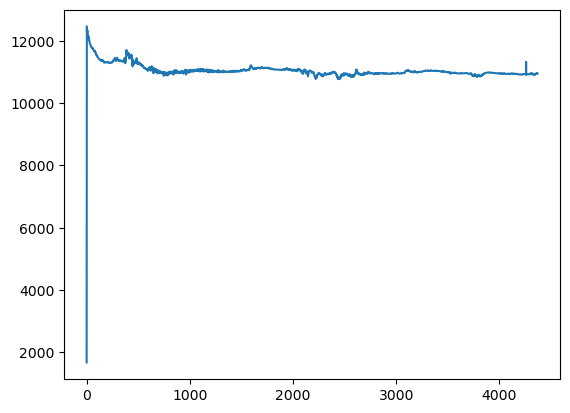

In [10]:
geos1_data['Bx'].plot()

### 3. Downloading GIMA and USGS Magnetometer Data
Next step to investigate our EZIE magnetometer measurements is to understand their accuracy. For this, we need to download magnetometer measurements for scientific grade instruments. There are two magnetometer stations one from Geophysical Institute Magnetometer Array (GIMA) at Poker Flat, AK and another from U.S. Geological Survey at College, AK. The widely used code names for these magnetometers are 'PKR'/'POKR' and 'CMO' respectively. We will use the SPEDAS package to download the data for these two sites.

In [11]:
# Libraries for downloading professional grade magnetometer measurements
import pyspedas 

Then we will need to set a time range, using start and stop times. These times are passed as strings to the pyspedas.themis.gmag library. You can instead use any start_time and end_time in datetime.datetime format. Here, I am using the first and last time entries in the geos1_data to match the data with our measurements.

In [12]:
#set start and end time for data analysis
start_time = pd.to_datetime(geos1_data.timeString.iloc[0])
end_time = pd.to_datetime(geos1_data.timeString.iloc[-1])
trange = [start_time.strftime('%Y-%m-%d/%H:%M:%S'), end_time.strftime('%Y-%m-%d/%H:%M:%S')]

Let's first download the data from Poker Flat station. We can pass sites=['pokr', 'cmo'] and download data simultaneously but for demonstraton purposes, I will download and assign data separately.

In [13]:
poker_data = pyspedas.themis.gmag(trange=trange, sites=['pokr'], 
                                level='l2', time_clip=True,notplot=True)


08-Jan-25 20:35:42: Downloading remote index: https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/pokr/2024/
08-Jan-25 20:35:43: No links matching pattern thg_l2_mag_pokr_20241216_v??.cdf found at remote index https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/pokr/2024/
08-Jan-25 20:35:43: No links matching pattern thg_l2_mag_pokr_20241217_v??.cdf found at remote index https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/pokr/2024/
08-Jan-25 20:35:44: Downloading https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/pokr/2024/thg_l2_mag_pokr_20241218_v01.cdf to themis_data/thg/l2/mag/pokr/2024/thg_l2_mag_pokr_20241218_v01.cdf
08-Jan-25 20:35:45: Download complete: themis_data/thg/l2/mag/pokr/2024/thg_l2_mag_pokr_20241218_v01.cdf
08-Jan-25 20:35:46: Downloading https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/pokr/2024/thg_l2_mag_pokr_20241219_v01.cdf to themis_data/thg/l2/mag/pokr/2024/thg_l2_mag_pokr_20241219_v01.cdf
08-Jan-25 20:35:48: Download complete: themis_data/

Let's check what the data looks like.

In [14]:
poker_data

{'thg_mag_pokr': {'x': array([1.73454905e+09, 1.73454905e+09, 1.73454905e+09, ...,
         1.73465280e+09, 1.73465280e+09, 1.73465280e+09]),
  'y': array([[12315.469 , -1549.2281, 53682.145 ],
         [12315.31  , -1549.3469, 53682.266 ],
         [12315.322 , -1549.575 , 53682.355 ],
         ...,
         [12354.403 , -1522.4438, 53739.676 ],
         [12354.338 , -1522.4469, 53739.715 ],
         [12354.31  , -1522.4281, 53739.785 ]], dtype=float32),
  'v': array([1, 2, 3], dtype=int32)}}

The data is read into a dictionary. This is different than the Pandas Dataframe. Here the 'x' is unixtime, 'y' is the magnetometer measurements, with each column representing Bx, By, Bz. Now, we will do the same for College site.

In [15]:
college_data = pyspedas.themis.gmag(trange=trange, sites=['cmo'], 
                                level='l2', time_clip=True,notplot=True)

08-Jan-25 20:35:51: Downloading remote index: https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/cmo/2024/
08-Jan-25 20:35:52: Downloading https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/cmo/2024/thg_l2_mag_cmo_20241216_v01.cdf to themis_data/thg/l2/mag/cmo/2024/thg_l2_mag_cmo_20241216_v01.cdf
08-Jan-25 20:35:53: Download complete: themis_data/thg/l2/mag/cmo/2024/thg_l2_mag_cmo_20241216_v01.cdf
08-Jan-25 20:35:54: Downloading https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/cmo/2024/thg_l2_mag_cmo_20241217_v01.cdf to themis_data/thg/l2/mag/cmo/2024/thg_l2_mag_cmo_20241217_v01.cdf
08-Jan-25 20:35:55: Download complete: themis_data/thg/l2/mag/cmo/2024/thg_l2_mag_cmo_20241217_v01.cdf
08-Jan-25 20:35:56: Downloading https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/cmo/2024/thg_l2_mag_cmo_20241218_v01.cdf to themis_data/thg/l2/mag/cmo/2024/thg_l2_mag_cmo_20241218_v01.cdf
08-Jan-25 20:35:58: Download complete: themis_data/thg/l2/mag/cmo/2024/thg_l2_mag_cmo_20241218_v01

### 4. Comparing EZIE measurements with the science grade magnetometers
Now that we have our own EZIE magnetometer measurements and science grade measurements, let's plot and compare the results. Below I will provide lines of code required to plot different components of the data set. Feel free to modify them as you see fit for your purposes. 

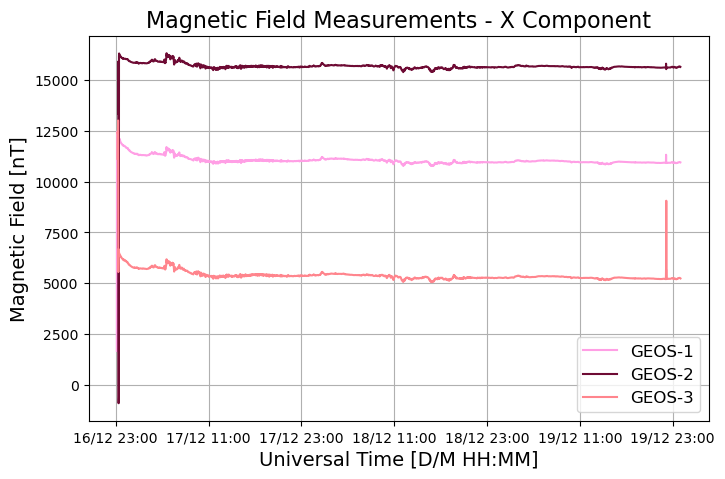

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

ax.plot(geos1_data['timeString'], geos1_data['Bx'], color='#FF9FE5', label='GEOS-1')
ax.plot(geos2_data['timeString'], geos2_data['Bx'], color='#6E0B34', label='GEOS-2')
ax.plot(geos3_data['timeString'], geos3_data['Bx'], color='#FF858D', label='GEOS-3')

ax.set_ylabel('Magnetic Field [nT]', fontsize=14)
ax.set_xlabel('Universal Time [D/M HH:MM]', fontsize=14)
ax.set_title('Magnetic Field Measurements - X Component', fontsize=16)

# Set the date format on the x-axis
date_format = mdates.DateFormatter('%d/%m %H:%M')
ax.xaxis.set_major_formatter(date_format)

# Optionally, you can set the locator for the ticks
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))

ax.legend(loc=4, fontsize=12)
ax.grid()


Before we save the plot, there are a few things that require our attention. The first one is the initial perturbation, or a period called warm-up, where sensors are still responding to perturbations after being plugged in and being contaminated with us walking around, setting them up. This data is not useable and needs to be removed. The second one is the offset we have between each magnetometer. These magnetometer kits are sometimes referred to as 'variometers' because they don't provide absolute measurements but variations. Therefore, it is common practice to remove either the first value in the measurements or the median of the duration. Since our first value is in the contaminated interval, we can remove those values first, and then remove the median as the baseline.  

In [17]:
geos1_data.Bx.head(10), geos2_data.Bx.head(10), geos3_data.Bx.head(10)

(0     1671.795873
 1     6757.706900
 2    12463.744884
 3    12252.854576
 4    12279.132869
 5    12270.333643
 6    12280.509051
 7    12345.398942
 8    12265.127374
 9    12246.209162
 Name: Bx, dtype: float64,
 0    13363.903750
 1    15916.195051
 2    14647.219367
 3     -896.643899
 4     -901.253557
 5     -905.183301
 6     -593.451570
 7    16177.103815
 8    16312.793903
 9    16243.299566
 Name: Bx, dtype: float64,
 0    11127.397601
 1    12444.468521
 2    12382.948354
 3    12354.391961
 4    13014.724717
 5     9105.129406
 6     5553.336958
 7     6491.937752
 8     6676.380095
 9     6525.768693
 Name: Bx, dtype: float64)

We can see what we regard as "contaminated period" has different durations for each magnetometer kit. We can either remove the first 10 minutes from all measurements or remove values based on variability of this duration.

In [18]:
geos1_data.drop(geos1_data.index[:10], inplace=True)
geos2_data.drop(geos2_data.index[:10], inplace=True)
geos3_data.drop(geos3_data.index[:10], inplace=True)

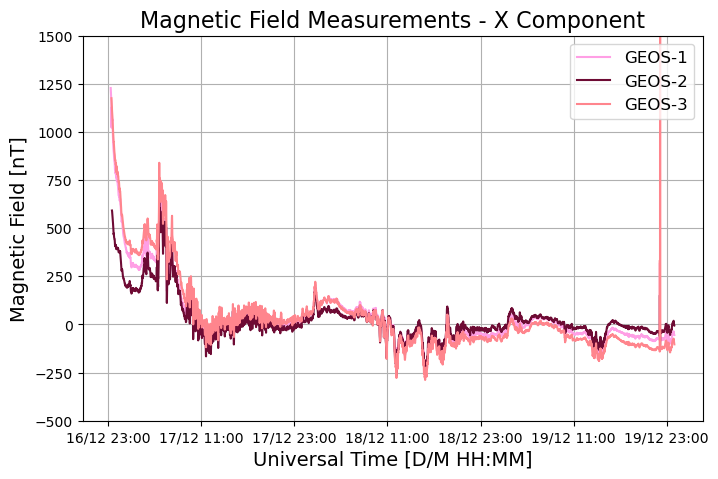

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

ax.plot(geos1_data['timeString'], geos1_data['Bx']-geos1_data['Bx'].median(), color='#FF9FE5', label='GEOS-1')
ax.plot(geos2_data['timeString'], geos2_data['Bx']-geos2_data['Bx'].median(), color='#6E0B34', label='GEOS-2')
ax.plot(geos3_data['timeString'], geos3_data['Bx']-geos3_data['Bx'].median(), color='#FF858D', label='GEOS-3')

ax.set_ylabel('Magnetic Field [nT]', fontsize=14)
ax.set_xlabel('Universal Time [D/M HH:MM]', fontsize=14)
ax.set_title('Magnetic Field Measurements - X Component', fontsize=16)

ax.set_ylim([-500,1500])
# Set the date format on the x-axis
date_format = mdates.DateFormatter('%d/%m %H:%M')
ax.xaxis.set_major_formatter(date_format)

# Optionally, you can set the locator for the ticks
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))

ax.legend(loc=1, fontsize=12)
ax.grid()

Now let's add the Poker Flat and College site data to this plot. First we need to convert the UnixTime to UT time.

In [20]:
poker_time_array = [dt.datetime(1970, 1, 1) + dt.timedelta(seconds=seconds) for seconds in poker_data['thg_mag_pokr']['x']]
college_time_array = [dt.datetime(1970, 1, 1) + dt.timedelta(seconds=seconds) for seconds in college_data['thg_mag_cmo']['x']]

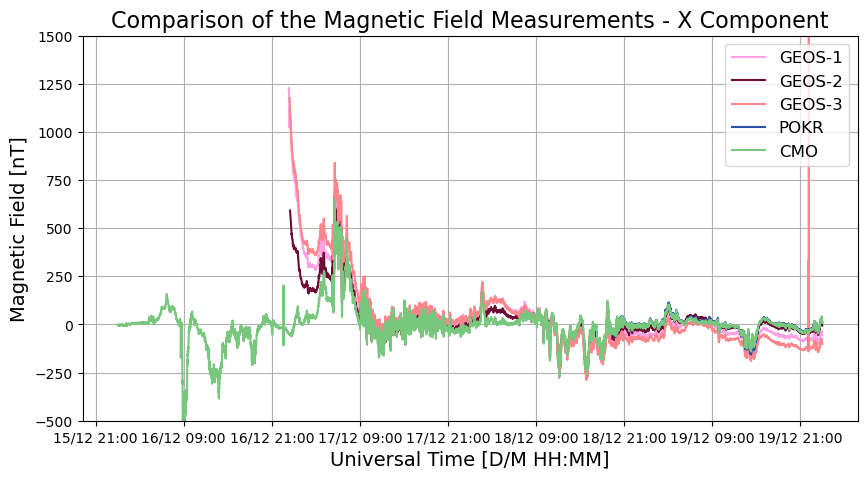

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(geos1_data['timeString'], geos1_data['Bx']-geos1_data['Bx'].median(), color='#FF9FE5', label='GEOS-1')
ax.plot(geos2_data['timeString'], geos2_data['Bx']-geos2_data['Bx'].median(), color='#6E0B34', label='GEOS-2')
ax.plot(geos3_data['timeString'], geos3_data['Bx']-geos3_data['Bx'].median(), color='#FF858D', label='GEOS-3')

ax.plot(poker_time_array, poker_data['thg_mag_pokr']['y'][:,0]-np.median(poker_data['thg_mag_pokr']['y'][:,0]), color='#2B50AA', label='POKR')
ax.plot(college_time_array, college_data['thg_mag_cmo']['y'][:,0]-np.median(college_data['thg_mag_cmo']['y'][:,0]), color='#77C77C', label='CMO')

ax.set_ylabel('Magnetic Field [nT]', fontsize=14)
ax.set_xlabel('Universal Time [D/M HH:MM]', fontsize=14)
ax.set_title('Comparison of the Magnetic Field Measurements - X Component', fontsize=16)

ax.set_ylim([-500,1500])
# Set the date format on the x-axis
date_format = mdates.DateFormatter('%d/%m %H:%M')
ax.xaxis.set_major_formatter(date_format)

# Optionally, you can set the locator for the ticks
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))

ax.legend(loc=1, fontsize=12)
ax.grid()

Before we start analyzing the comparison in more depth there are a few more considerations we need to take into account. The first one is the overlapping of lines. We can introduce the alpha, transparency parameter, to show overlapping lines  better. 

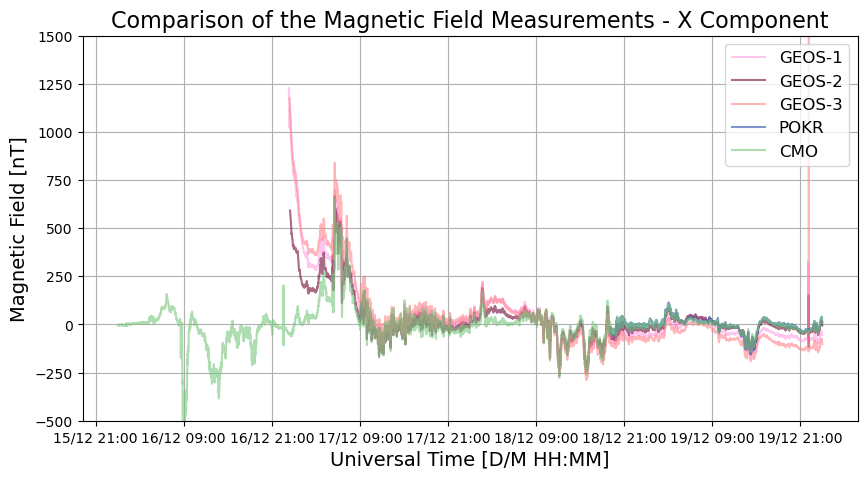

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(geos1_data['timeString'], geos1_data['Bx']-geos1_data['Bx'].median(), color='#FF9FE5', alpha=0.6, label='GEOS-1')
ax.plot(geos2_data['timeString'], geos2_data['Bx']-geos2_data['Bx'].median(), color='#6E0B34', alpha=0.6, label='GEOS-2')
ax.plot(geos3_data['timeString'], geos3_data['Bx']-geos3_data['Bx'].median(), color='#FF858D', alpha=0.6, label='GEOS-3')

ax.plot(poker_time_array, poker_data['thg_mag_pokr']['y'][:,0]-np.median(poker_data['thg_mag_pokr']['y'][:,0]), color='#2B50AA', alpha=0.6, label='POKR')
ax.plot(college_time_array, college_data['thg_mag_cmo']['y'][:,0]-np.median(college_data['thg_mag_cmo']['y'][:,0]), color='#77C77C', alpha=0.6, label='CMO')

ax.set_ylabel('Magnetic Field [nT]', fontsize=14)
ax.set_xlabel('Universal Time [D/M HH:MM]', fontsize=14)
ax.set_title('Comparison of the Magnetic Field Measurements - X Component', fontsize=16)

ax.set_ylim([-500,1500])
# Set the date format on the x-axis
date_format = mdates.DateFormatter('%d/%m %H:%M')
ax.xaxis.set_major_formatter(date_format)

# Optionally, you can set the locator for the ticks
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))

ax.legend(loc=1, fontsize=12)
ax.grid()

What adding the alpha parameter showed us is that:
- The warm-up period in EZIE magnetometer kits is longer than 10 minutes. However, the peak we see around 23.40 UT is seen in the CMO measurements too, which indicates it is likely to be a real variation. 
- Poker Flat data is missing and only starts around 2024-12-18, 19:10 UT. 
- The sharp peak toward the end of the interval is seen by all three EZIE magnetometer kits. It could potentially be an artificial signature and needs to be further investigated before being removed as an outlier.

Now, we can save the figure. 

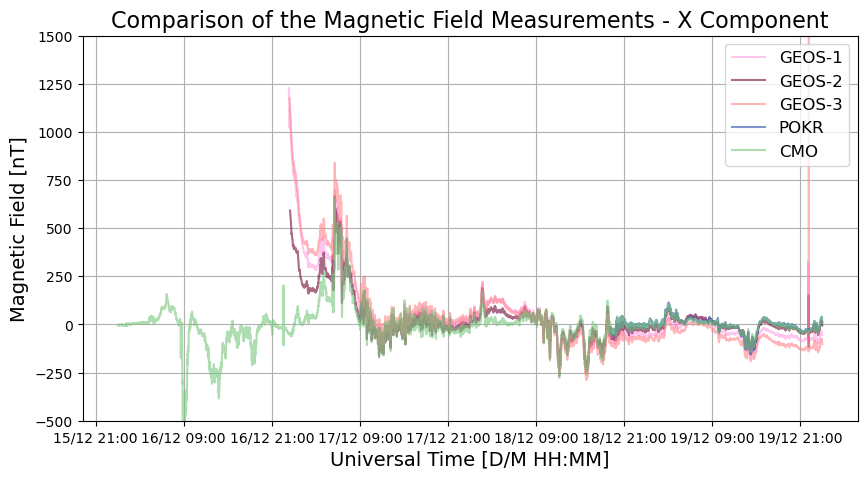

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(geos1_data['timeString'], geos1_data['Bx']-geos1_data['Bx'].median(), color='#FF9FE5', alpha=0.6, label='GEOS-1')
ax.plot(geos2_data['timeString'], geos2_data['Bx']-geos2_data['Bx'].median(), color='#6E0B34', alpha=0.6, label='GEOS-2')
ax.plot(geos3_data['timeString'], geos3_data['Bx']-geos3_data['Bx'].median(), color='#FF858D', alpha=0.6, label='GEOS-3')

ax.plot(poker_time_array, poker_data['thg_mag_pokr']['y'][:,0]-np.median(poker_data['thg_mag_pokr']['y'][:,0]), color='#2B50AA', alpha=0.6, label='POKR')
ax.plot(college_time_array, college_data['thg_mag_cmo']['y'][:,0]-np.median(college_data['thg_mag_cmo']['y'][:,0]), color='#77C77C', alpha=0.6, label='CMO')

ax.set_ylabel('Magnetic Field [nT]', fontsize=14)
ax.set_xlabel('Universal Time [D/M HH:MM]', fontsize=14)
ax.set_title('Comparison of the Magnetic Field Measurements - X Component', fontsize=16)

ax.set_ylim([-500,1500])
# Set the date format on the x-axis
date_format = mdates.DateFormatter('%d/%m %H:%M')
ax.xaxis.set_major_formatter(date_format)

# Optionally, you can set the locator for the ticks
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))

ax.legend(loc=1, fontsize=12)
ax.grid()

fig.savefig('./magnetometer_data_comparison_{0:%Y_%m_%d_%H}.png'.format(geos1_data['timeString'].iloc[0]), bbox_inches='tight', dpi=200)